### Anirudh Sriram
### 21BAI1239

#### Penguin Classification Analysis

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

**1) Download the data set and load into the tool**

In [2]:
df=pd.read_csv('penguin.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


**2)Check for missing values and deal with them**

In [3]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

*Since sex is a categorical value, we shall replace the null values with the mode sex(gender)*

In [5]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [6]:
df['sex'].mode()

0    MALE
Name: sex, dtype: object

In [7]:
df['sex']=df['sex'].fillna('MALE')
df['sex']=df['sex'].replace('.','MALE')
df.isnull().sum()

species              0
island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  0
dtype: int64

*Since culmen_length,culmen_depth, flipper_length and body_mass are numeric(float) values, we shall replace the null values with the median*

In [8]:
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].median())
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].median())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].median())

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**3)Perform descriptive statistics on the dataset**

In [10]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**4) Perform Univariate, Bivariate and Multivariate analysis**

In [11]:
# univariate
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

<Figure size 400x400 with 0 Axes>

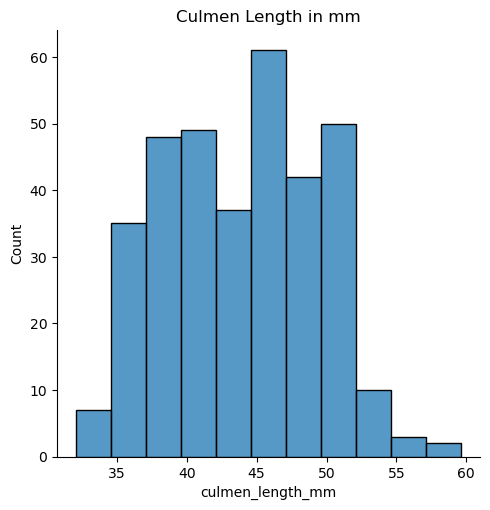

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4,4))
sns.displot(df['culmen_length_mm'])
plt.title('Culmen Length in mm')
plt.show()

<Figure size 400x400 with 0 Axes>

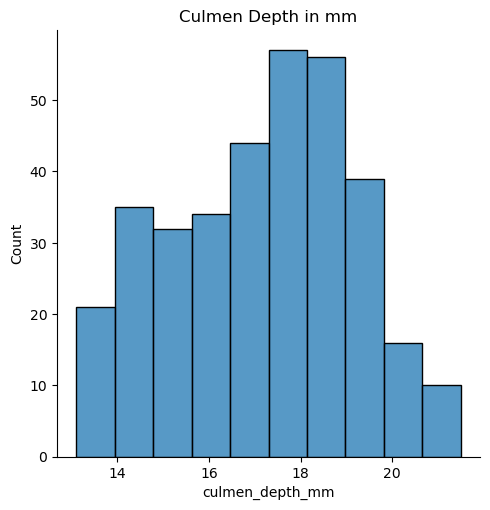

In [14]:
plt.figure(figsize=(4,4))
sns.displot(df['culmen_depth_mm'])
plt.title('Culmen Depth in mm')
plt.show()

<Figure size 400x400 with 0 Axes>

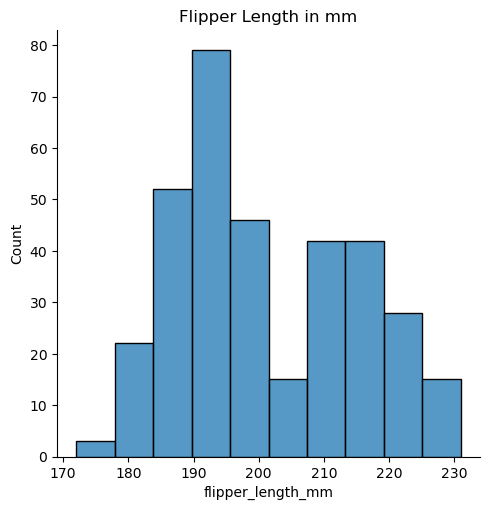

In [15]:
plt.figure(figsize=(4,4))
sns.displot(df['flipper_length_mm'])
plt.title('Flipper Length in mm')
plt.show()

<Figure size 400x400 with 0 Axes>

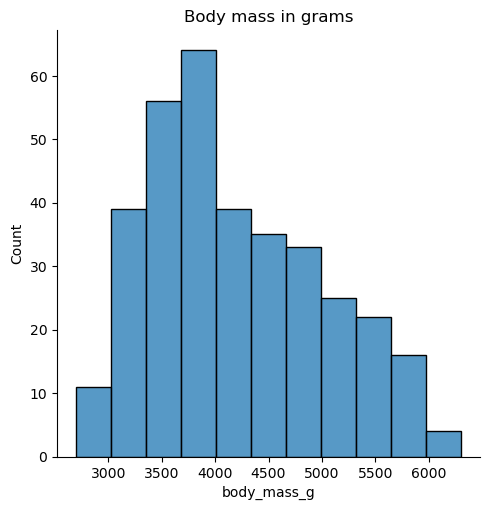

In [16]:
plt.figure(figsize=(4,4))
sns.displot(df['body_mass_g'])
plt.title('Body mass in grams')
plt.show()

In [17]:
df['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

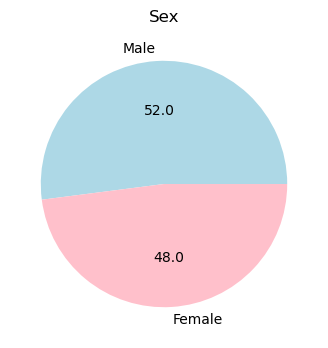

In [18]:
plt.figure(figsize=(4,4))
plt.pie(df['sex'].value_counts(),labels=['Male','Female'],autopct='%1.1f',colors=['LightBlue','Pink'])
plt.title('Sex')
plt.show()

In [19]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

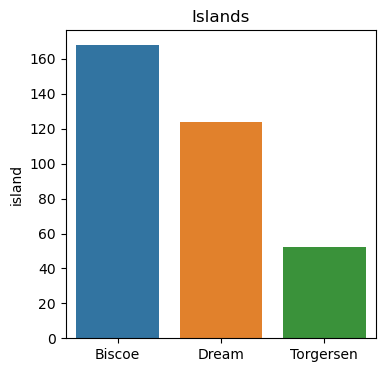

In [20]:
plt.figure(figsize=(4,4))
sns.barplot(x=df['island'].value_counts().index,y=df['island'].value_counts())
plt.title('Islands')
plt.show()

In [21]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

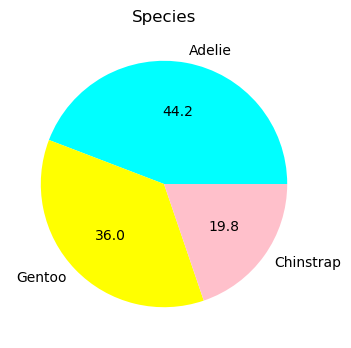

In [22]:
plt.figure(figsize=(4,4))
plt.pie(df['species'].value_counts(),labels=['Adelie','Gentoo','Chinstrap'],autopct='%1.1f',colors=['Cyan','Yellow','Pink'])
plt.title('Species')
plt.show()

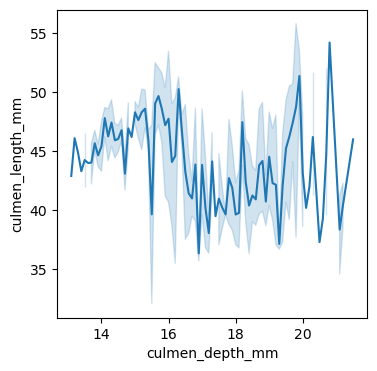

In [23]:
#bivariate
plt.figure(figsize=(4,4))
sns.lineplot(x=df['culmen_depth_mm'],y=df['culmen_length_mm'])
plt.show()

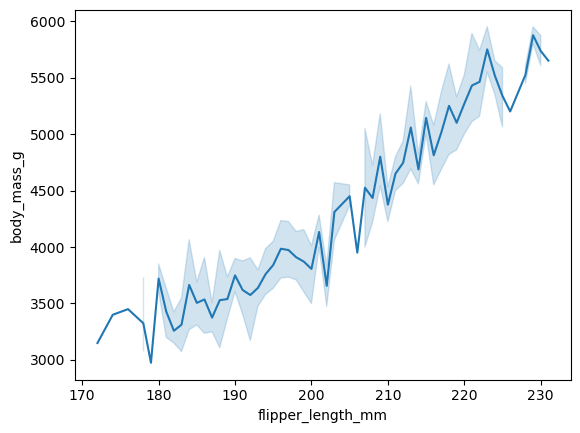

In [24]:
sns.lineplot(x=df['flipper_length_mm'],y=df['body_mass_g'])
plt.show()

In [25]:
#multivariate analysis

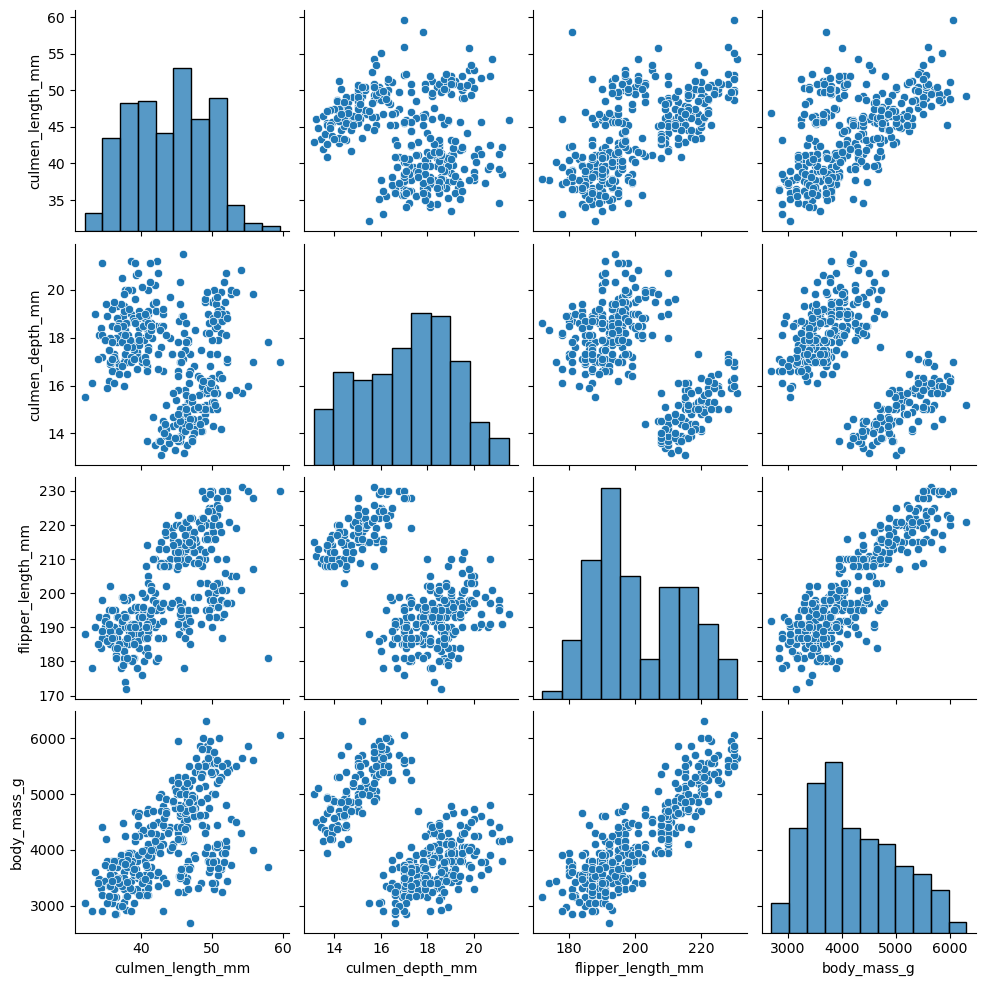

In [26]:
sns.pairplot(df)

<Axes: >

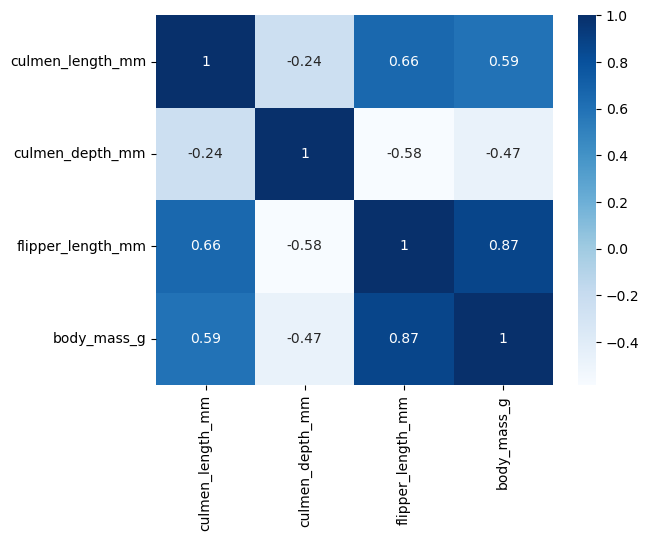

In [27]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

**5)Find outliers and replace them**

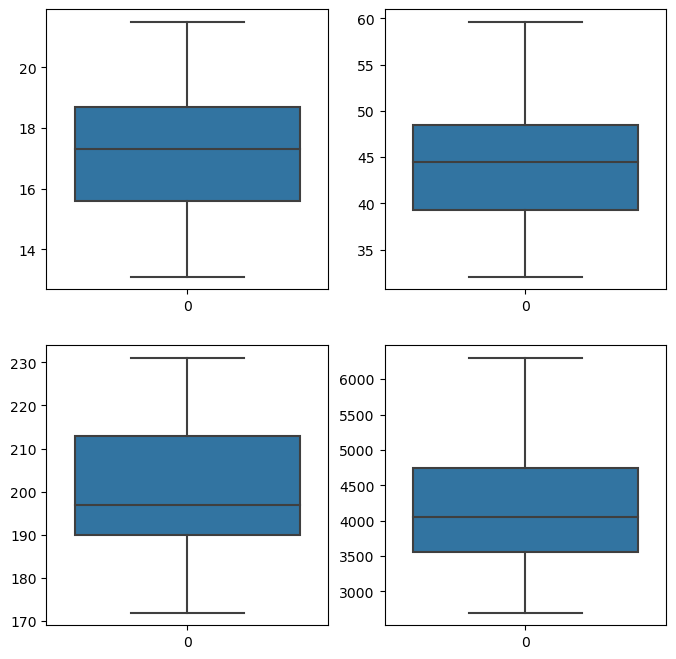

In [28]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(df['culmen_depth_mm'])
plt.subplot(2,2,2)
sns.boxplot(df['culmen_length_mm'])
plt.subplot(2,2,3)
sns.boxplot(df['flipper_length_mm'])
plt.subplot(2,2,4)
sns.boxplot(df['body_mass_g'])
plt.show()

No outliers

**6) Check for categorical columns and perform encoding**

In [30]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])
df['species']=le.fit_transform(df['species'])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


**7)Check the correlation of independent variables with the target**

In [35]:
df.corr().species.sort_values()

culmen_depth_mm     -0.741282
island              -0.635659
sex                  0.010240
culmen_length_mm     0.728706
body_mass_g          0.747547
flipper_length_mm    0.850819
species              1.000000
Name: species, dtype: float64

**8) Split the data into dependent and independent variables**

In [86]:
df['species'].replace([0,1,2],['Adelie','Chinstrap','Gentoo'],inplace=True)
X=df.drop('species',axis=1)
y=df['species']

In [88]:
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


**9) Scale the data**

In [89]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [90]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


**10)Split the data into training and testing**

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

**11)Check the training and testing data shape**

In [93]:
X_train.shape

(275, 6)

In [94]:
X_test.shape

(69, 6)

**12) Training the Classification Model**

In [95]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [96]:
lr.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred=lr.predict(X_test)

In [108]:
df_new=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df_new.head()

,actual,predicted
194,Chinstrap,Chinstrap
157,Chinstrap,Chinstrap
225,Gentoo,Gentoo
208,Chinstrap,Chinstrap
318,Gentoo,Gentoo


**12b) Performance Metrics**

In [111]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_test,y_pred)

0.9855072463768116